## Table of Contents
- 1. [데이터 탐색](#ch1)
- 2. [탐색적 데이터 분석](#ch2)

### All the used libraries :
- numpy
- pandas
- Matplotlib
- Seaborn
- XGBoost
- warnings

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings('ignore')

In [3]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


## 01. 데이터 탐색 <a class='anchor' id='ch1'></a>
이 대회의 데이터셋(훈련 및 테스트 모두)은 "은행 고객 이탈 예측" 데이터셋에서 훈련된 딥러닝 모델에서 생성되었습니다. 특성 분포는 원본과 매우 유사하지만 정확히는 동일하지 않습니다.

In [5]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

original_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [6]:
train_data.shape, test_data.shape, sample_submission.shape, original_data.shape

((165034, 14), (110023, 13), (110023, 2), (10000, 14))

### 1-2. Train Data

In [7]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


#### code description
- train_data.describe(): 데이터프레임의 기술 통계량을 계산합니다. 이에는 각 열의 개수(count), 평균(mean), 표준 편차(std), 최솟값(min), 25%, 50%, 75% 백분위수 및 최댓값(max)이 포함됩니다.

- .T: 전치(transpose) 연산을 수행하여 행과 열을 바꿉니다. 이렇게 하면 통계량이 열 방향으로 표시됩니다.

- .style.background_gradient(): Pandas의 스타일링 기능 중 하나인 background_gradient를 사용하여 배경 색상 그라데이션을 적용합니다. 이는 통계량의 크기에 따라 색상을 조절하여 시각적으로 눈에 띄게 만들어줍니다.

In [8]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


### 1-3. Test Data

In [9]:
test_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


In [10]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


#### 1-4. Original Data

In [11]:
original_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [12]:
original_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


## 02. 탐색적 데이터 분석 <a class='anchor' id='ch2'></a>
- 탐색적 데이터 분석(Exploratory Data Analysis, EDA)"은 데이터를 탐험하고 이해하기 위한 과정을 가리키는 용어입니다. EDA는 주로 통계적 그래픽 및 기술적인 방법을 사용하여 데이터셋의 패턴, 추세, 이상치 등을 파악하는 과정을 포함합니다. 목적은 데이터의 특성을 이해하고 흥미로운 인사이트를 도출하여 모델링이나 분석 작업에 대한 기초를 마련하는 것입니다.

### 2-1. Null 값
- 널 값은 주어진 데이터셋에서 특정 변수에 대해 저장되지 않거나(또는 존재하지 않는) 값 또는 데이터로 정의됩니다. 다음은 다음은 데이터셋에서 결측값을 처리하는 데 사용되는 전략입니다.
    - 결측값 삭제
    - 결측값 대체
    - 범주형 특성의 결측값 대체
    - Sci-kit Learn 라이브러리를 사용한 결측값 대체
    - 결측값을 특성으로 활용

#### Code Description
- sns.displot: Seaborn에서 제공하는 분포 시각화를 위한 함수입니다.

- data=train_data.isnull().melt(value_name='missing'): train_data의 결측값을 확인하고, melt 함수를 사용하여 데이터를 "long-form"으로 변환합니다. 각 결측값의 위치를 변수 이름과 함께 표현합니다.

- y='variable': y축에 사용할 변수는 'variable'로 설정합니다.

- hue='missing': 각 변수의 결측값 여부를 색상으로 구분합니다.

- multiple='fill': 여러 개의 히스토그램을 쌓아서 표시합니다.

- height=8: 그림의 높이를 8로 설정합니다.

- aspect=1.6: 가로/세로 비율을 1.6으로 설정합니다.

- plt.axvline(0.4, color='r'): x축에 수직선을 추가합니다. 여기서 0.4는 임계값을 나타내며, color='r'는 빨간색을 나타냅니다. 이 선은 결측값 비율이나 특정 기준을 나타내기 위해 사용될 수 있습니다.

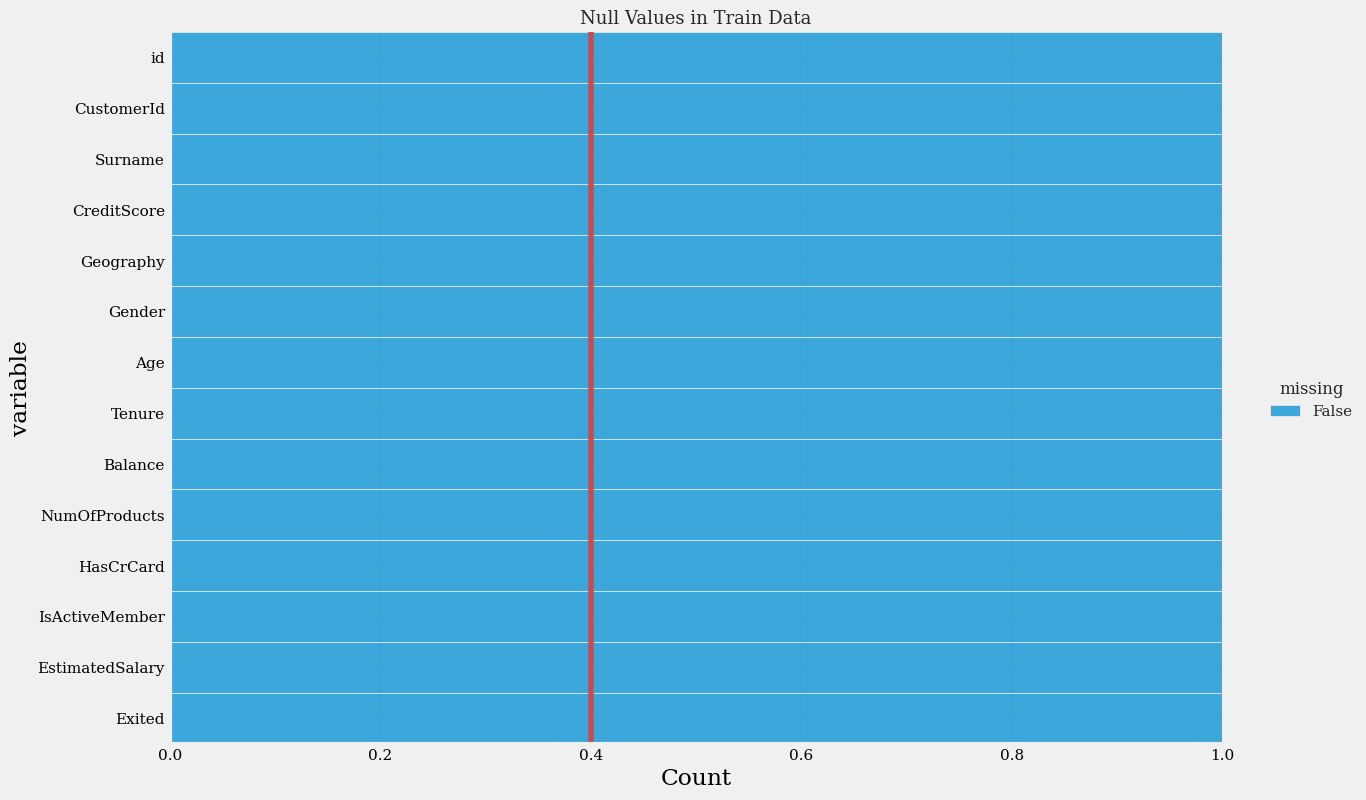

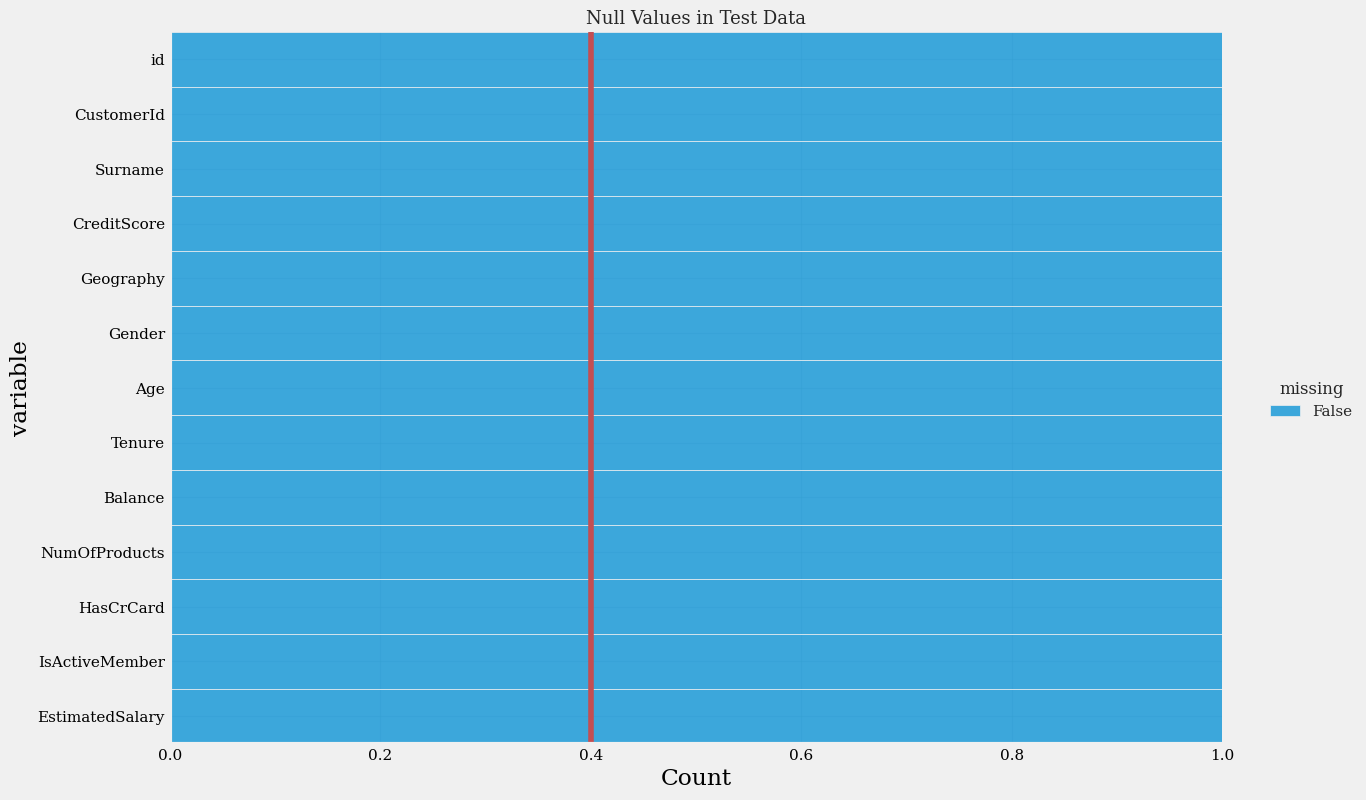

In [13]:
# train data
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# 임계값 지정
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

# -------------------------
# test data

sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

##### train 데이터와 test 데이터 모두 결측값이 없다.

### 2-2. 목표변수분석

#### code description
- f,ax=plt.subplots(1,2,figsize=(19,8)): 1x2 크기의 subplot을 생성합니다.전체적인 그림 크기는 (19, 8)로 설정됩니다.

- train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True): 훈련 데이터의 'Exited' 열 값의 빈도를 계산하여 원형 차트로 표시합니다. autopct='%1.1f%%'는 각 섹션에 퍼센트 값을 표시하도록 지정하고, ax=ax[0]는 첫 번째 subplot에 그리도록 설정합니다. shadow=True는 그림자를 표시하는 옵션입니다.

- ax[0].set_ylabel(''): 첫 번째 subplot의 y축 레이블을 제거합니다.

- sns.countplot(x='Exited',data=train_data,ax=ax[1]): Seaborn의 countplot을 사용하여 'Exited' 열의 값에 대한 막대 그래프를 그립니다. 이 그래프는 두 번째 subplot에 표시됩니다.

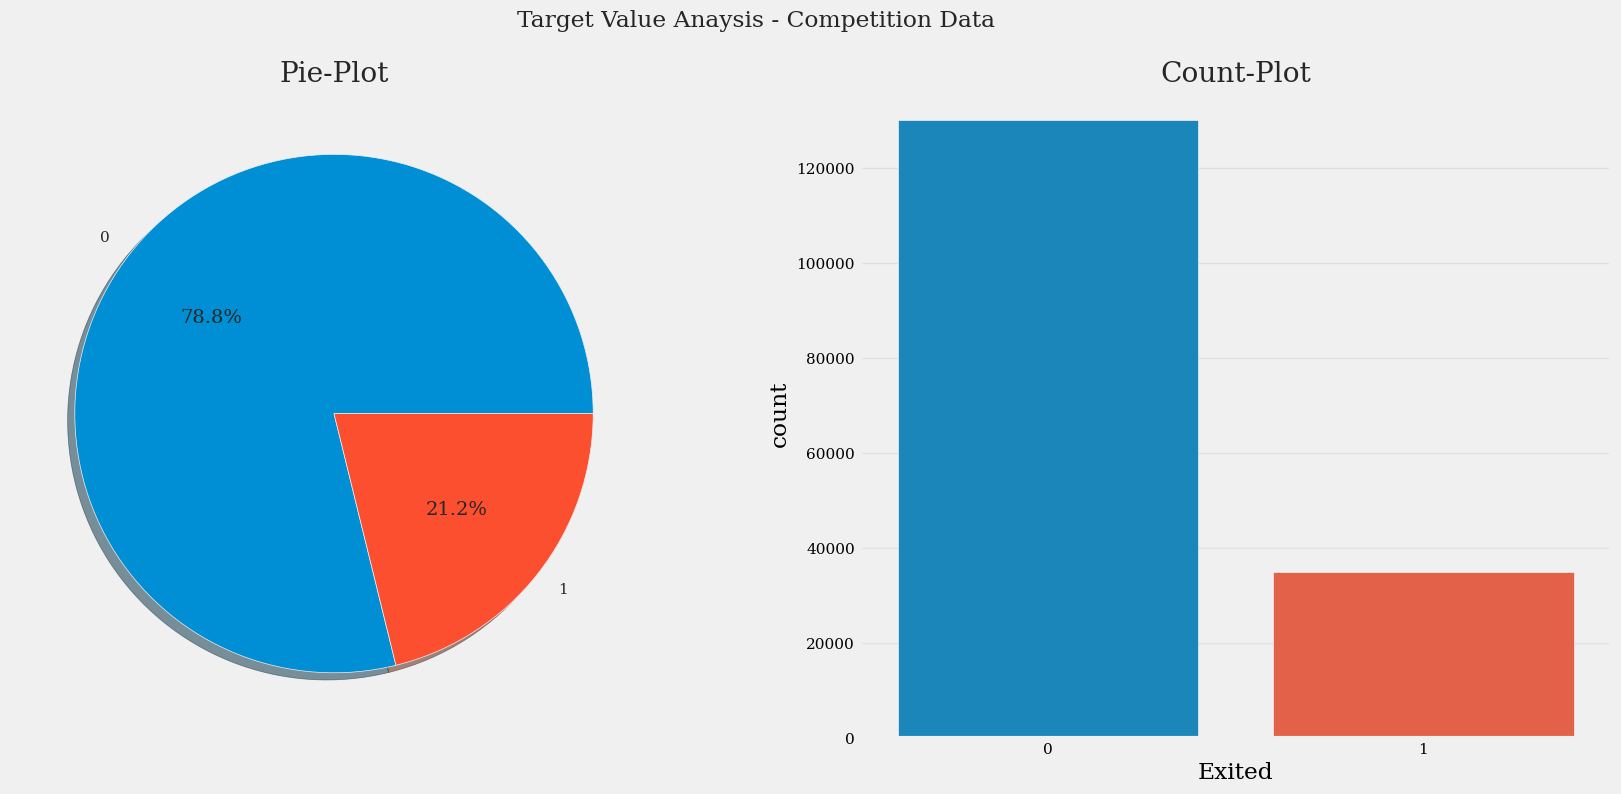

In [14]:
f,ax=plt.subplots(1,2,figsize=(19,8))
# Exited : 고객이탈여부(목표변수)
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data')
plt.show()

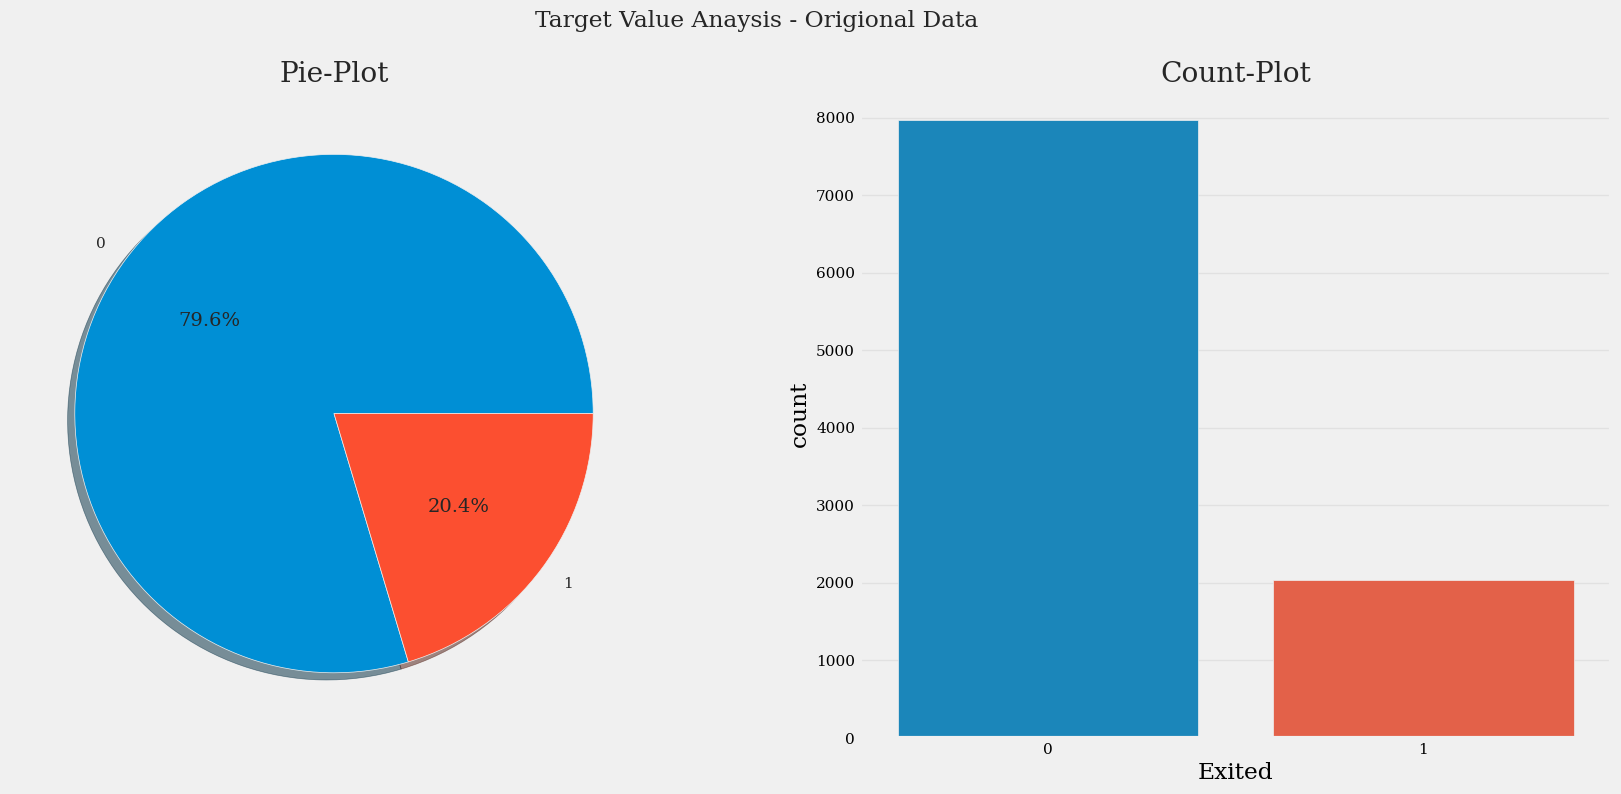

In [15]:
f,ax=plt.subplots(1,2,figsize=(19,8))
original_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=original_data,ax=ax[1])
ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Origional Data')
plt.show()

##### 위의 그래프로부터 얻은 몇 가지 관찰:

- 원본 데이터셋과 경쟁 데이터셋 모두 'Exited' 및 'Not Exited' 클래스의 분포가 거의 동일합니다.

- 또한 데이터가 매우 불균형되어 있음을 확인할 수 있습니다. 거의 80%의 데이터가 클래스 0(이탈하지 않음)에서 나오며, 20%의 데이터가 클래스 1(이탈함)에서 나옵니다.

- 은행을 떠나거나 이탈하는 사람들의 패턴을 분석하고 싶습니다.

#### Code Description
- unique_counts = train_data.nunique(): 각 열의 고유 값 수를 계산하여 unique_counts에 저장합니다.

- threshold = 12: 연속형과 범주형 변수를 구분하기 위한 임계값을 설정합니다.

- continuous_vars = unique_counts[unique_counts > threshold].index.tolist(): 고유 값 수가 임계값을 초과하는 경우, 해당 열은 연속형 변수로 간주하고 리스트에 추가합니다.

- categorical_vars = unique_counts[unique_counts <= threshold].index.tolist(): 고유 값 수가 임계값 이하인 경우, 해당 열은 범주형 변수로 간주하고 리스트에 추가합니다.

- if 'outcome' in categorical_vars:: 'outcome' 열이 범주형 변수 리스트에 있으면 해당 열을 제거합니다.

- if 'id' in continuous_vars:: 'id' 열이 연속형 변수 리스트에 있으면 해당 열을 제거합니다.

In [16]:
# 각 열의 고유값의 수
unique_counts = train_data.nunique()

# 연속형과 범주형을 구분하기 위한 임계값
threshold = 12

# 연속형 변수
continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
# 범주형 변수
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# 타겟 변수'outcome'을 범주형에서 제거
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

# 'outcome'이 범주형 변수에서 제거되었는지 확인
print(f"Categorical Variables: {categorical_vars}")
# 'id'가 연속형 변수에서 제거되었는지 확인
print(f"Continousl/Numerical Variables: {continuous_vars}")

Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Continousl/Numerical Variables: ['CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']


### 2-3. 범주형 변수 분석:
통계학에서 범주형 변수(또는 질적 변수)는 한정된 수의 가능한 값 중 하나를 가질 수 있는 변수로, 일반적으로 고정된 값입니다. 각 개체 또는 다른 관측 단위를 어떤 질적 속성에 기초하여 특정 그룹이나 명목 범주에 할당합니다. 범주형 데이터는 범주형 변수로 이루어진 통계 데이터 유형이거나 해당 형식으로 변환된 데이터로 구성됩니다.

우리 데이터에서 다루는 범주형 변수:
- Geography
- Gender
- Tenure
- NumOfProducts
- HasCrCard
- IsActiveMember

#### Code Description
- categorical_vars.remove('Exited'): 'Exited' 열을 범주형 변수에서 제외합니다. 'Exited'는 목표 변수로, 시각화 대상이 아닙니다.

- for column in categorical_vars:: 각 범주형 변수에 대해 반복

- f,ax=plt.subplots(1,2,figsize=(18,5.5)): 1x2 크기의 subplot을 생성합니다. 전체적인 그림 크기는 (18, 5.5)로 설정됩니다.

- ax[0].set_ylabel(f'{column}'): 첫 번째 subplot의 y축 레이블에 현재 범주형 변수의 이름을 추가합니다.

- sns.countplot(x=column,data=train_data,ax=ax[1]): Seaborn의 countplot을 사용하여 현재 범주형 변수에 대한 막대 그래프를 그립니다. 이 그래프는 두 번째 subplot에 표시됩니다.

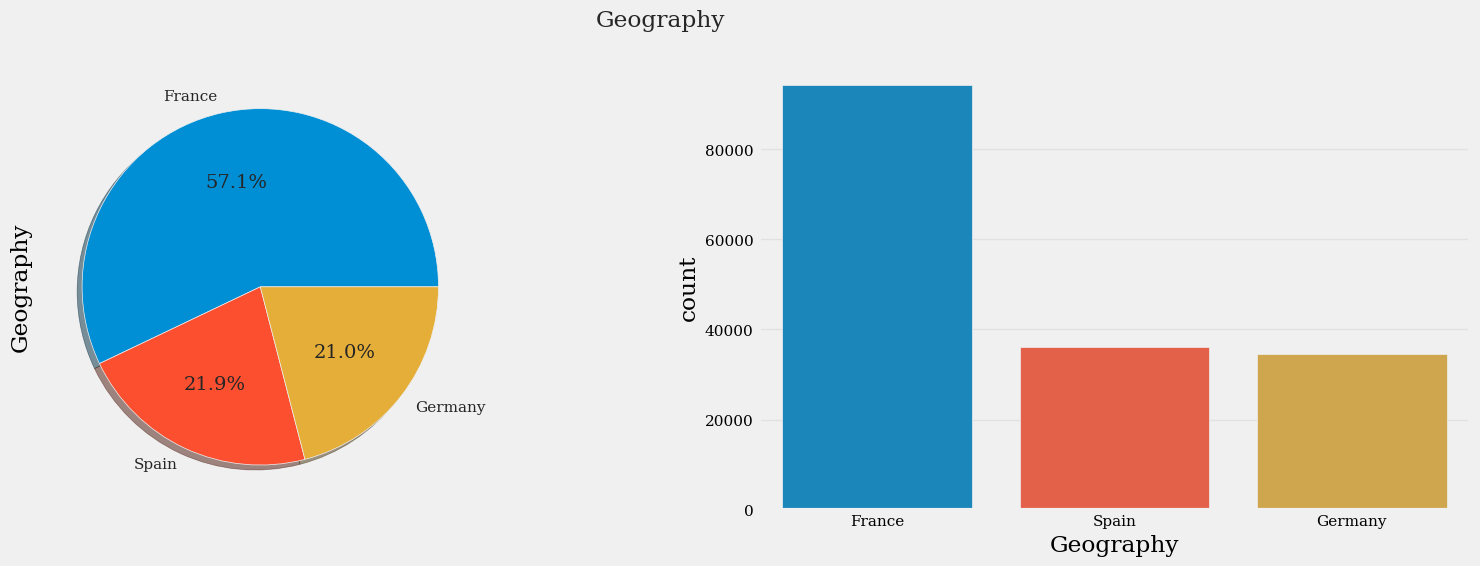

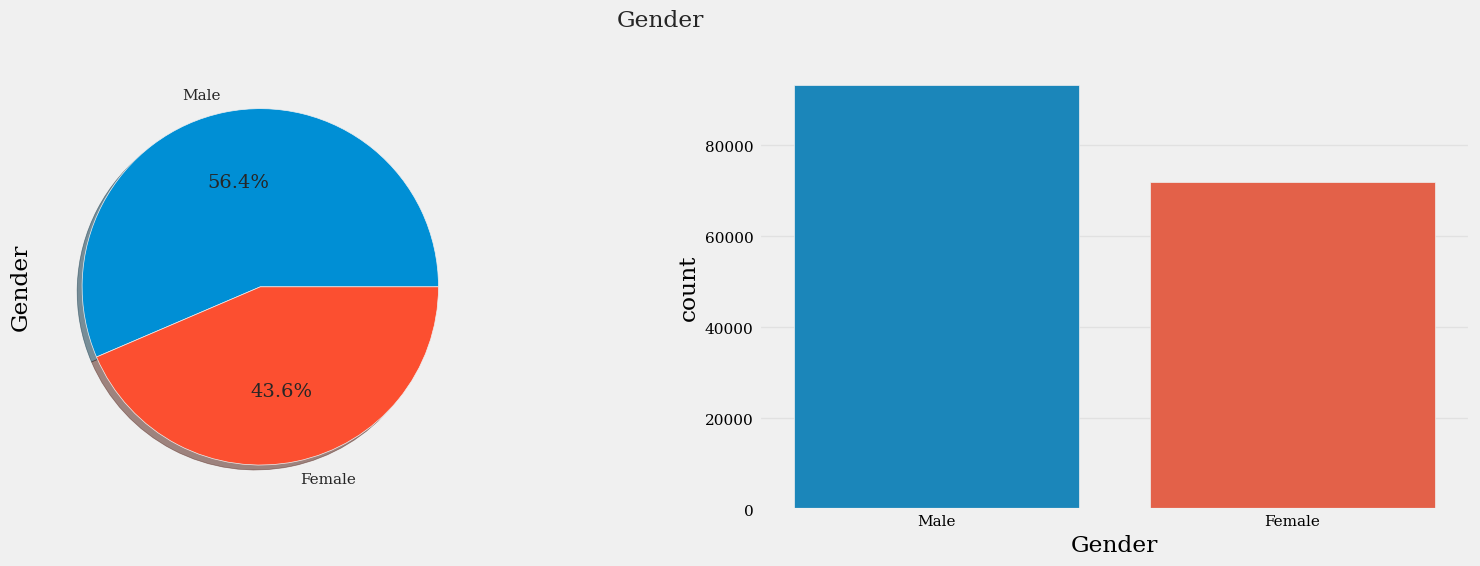

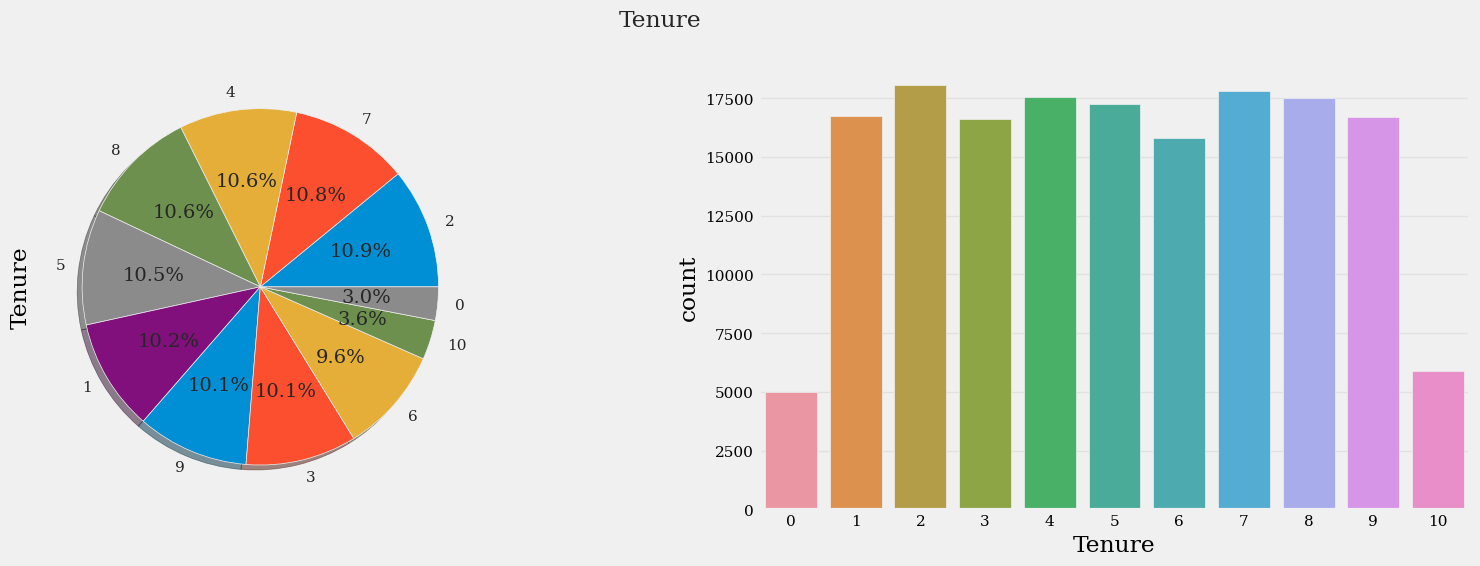

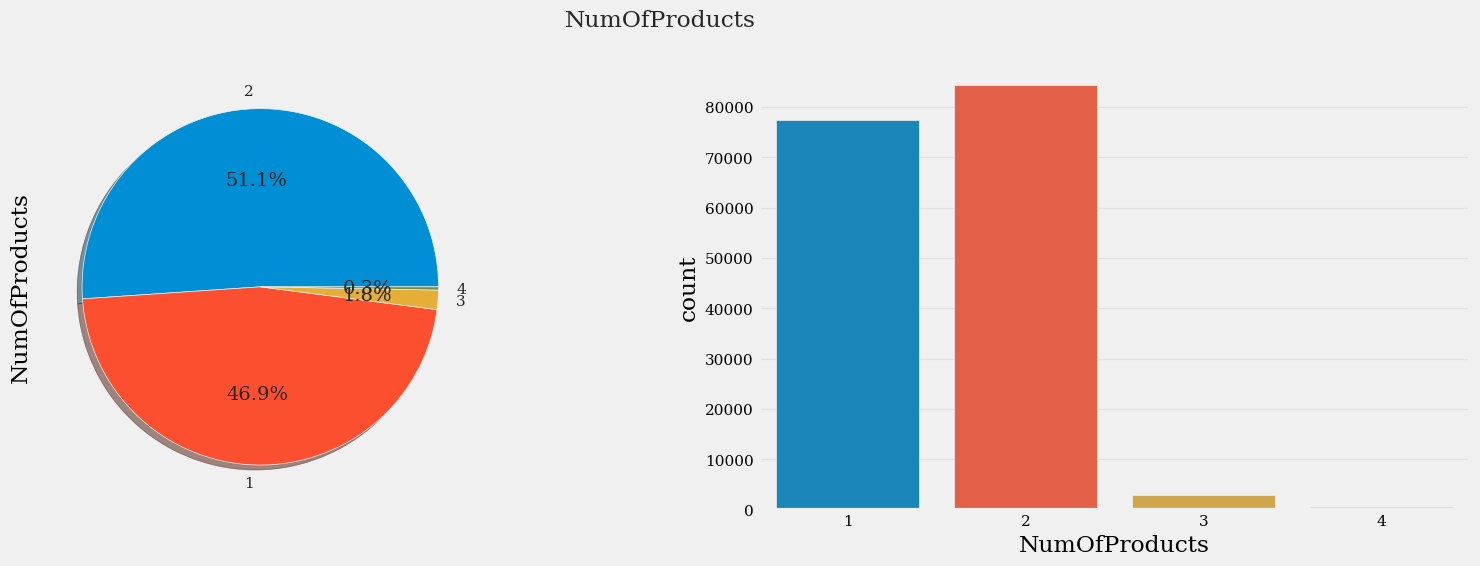

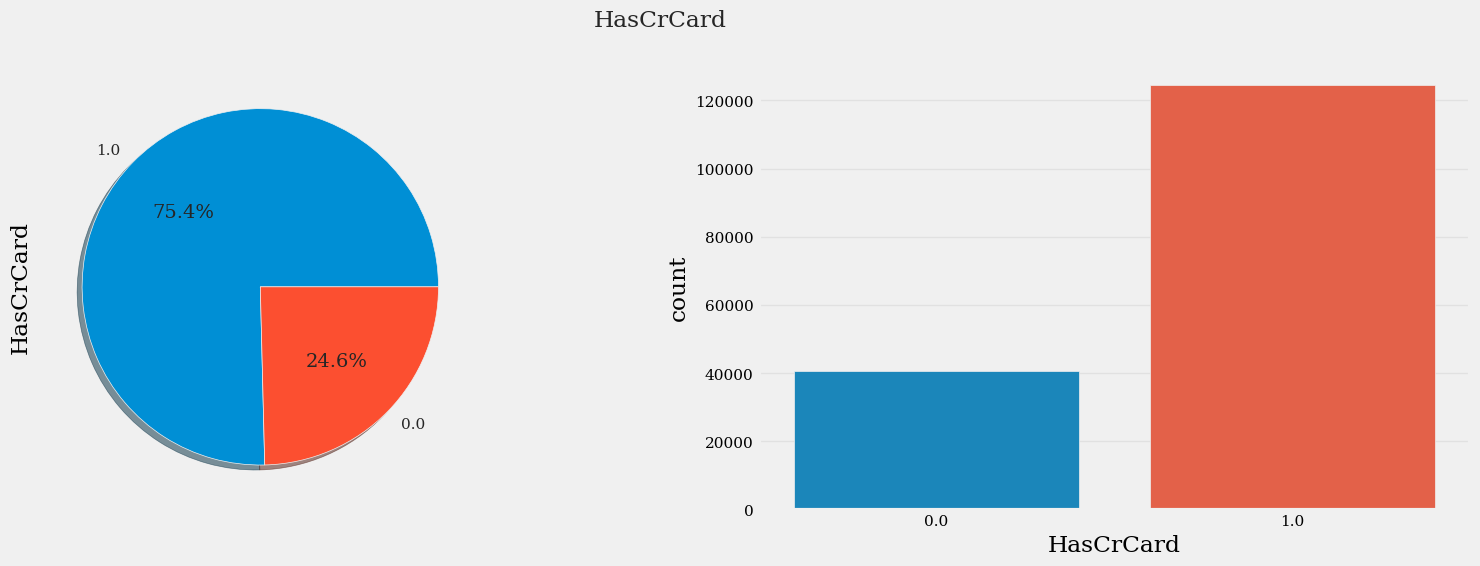

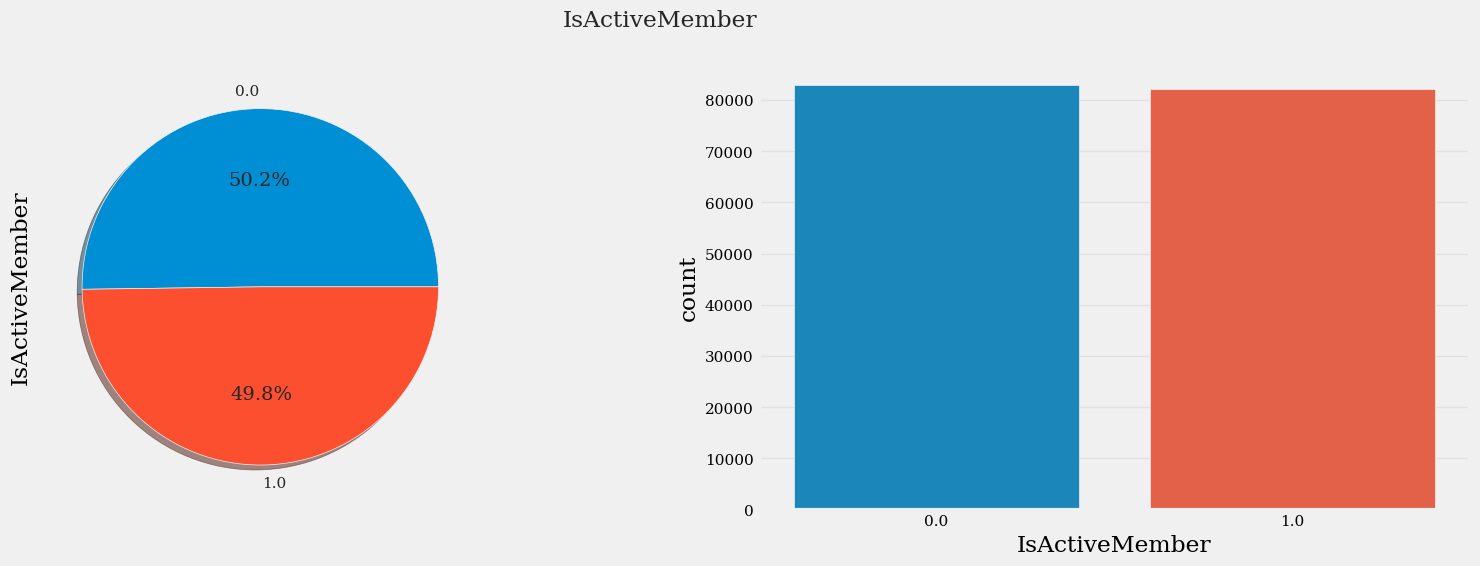

In [17]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

##### 위의 그래프로부터 얻은 몇 가지 관찰:
- IsActiveMember, Tenure 및 Gender와 같은 일부 변수는 거의 균등하게 분포되어 있으나, HasCrCard, NumOfProducts 및 Gender와 같은 다른 변수는 균등하게 분포되어 있지 않습니다.

- Tenure이 연속형 변수로 보이지만, 실제로는 0부터 10까지 11개의 클래스를 가진 범주형 변수입니다

#### 2.4 수치형 값 분석:
수학에서 변수가 두 개 이상의 구별된 실수 값을 가질 수 있으며 이 사이의 모든 실수 값을 가질 수 있으며 (심지어 서로 무작위로 가까운 값일지라도) 연속 변수로 간주됩니다. 이 경우 주어진 구간에서 변수는 연속형입니다. 연속 데이터는 연속형 변수로 이루어진 통계 데이터 형식이거나 해당 형식으로 변환된 데이터로 구성됩니다.

우리 데이터에서 연속 변수는 다음과 같습니다:
- 신용 점수 (CreditScore)
- 나이 (Age)
- 잔액 (Balance)
- 추정 급여 (EstimatedSalary)

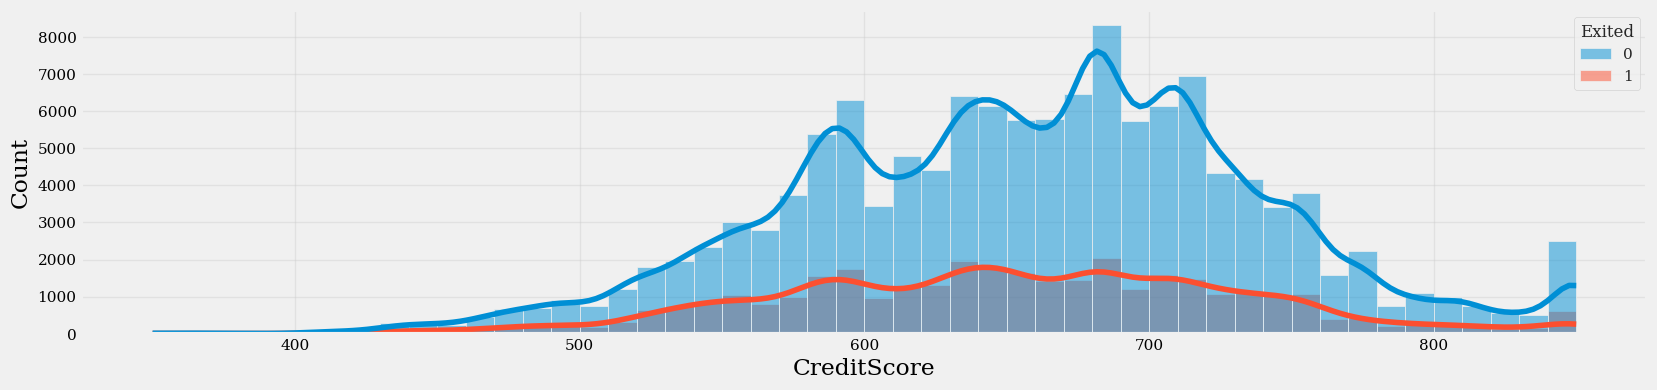

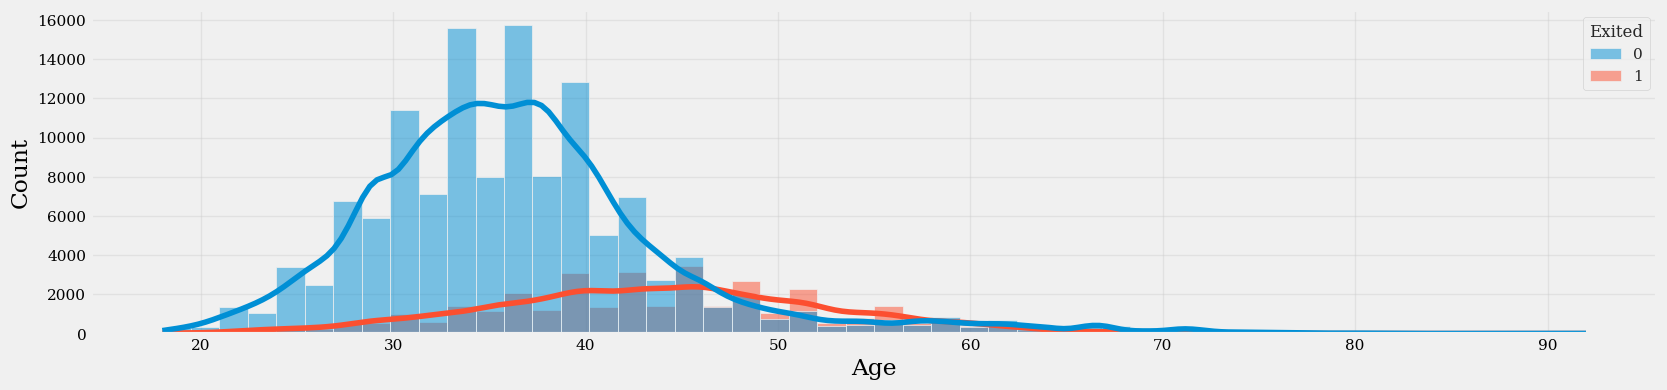

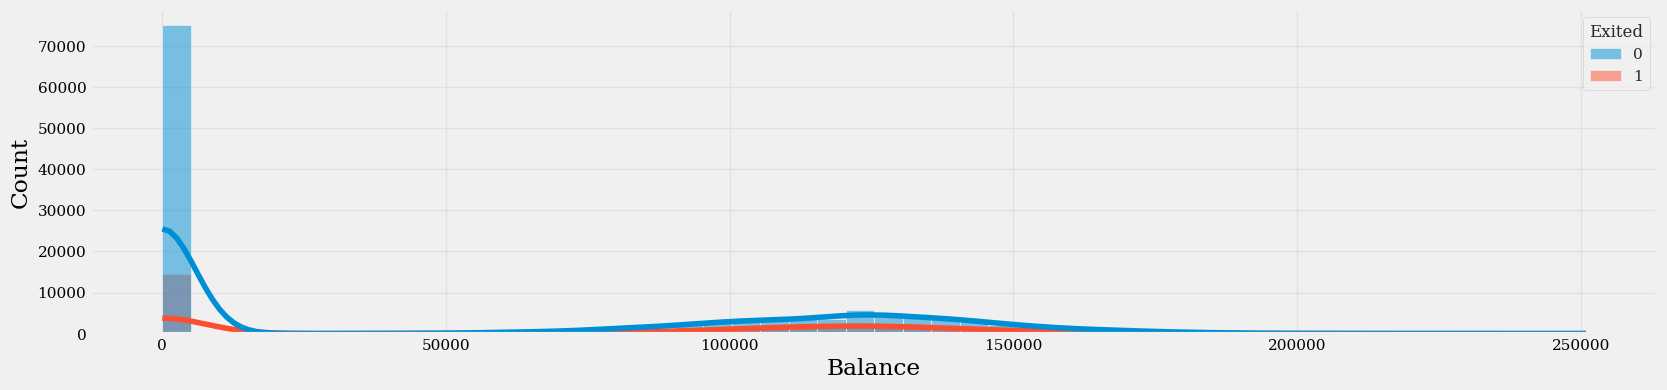

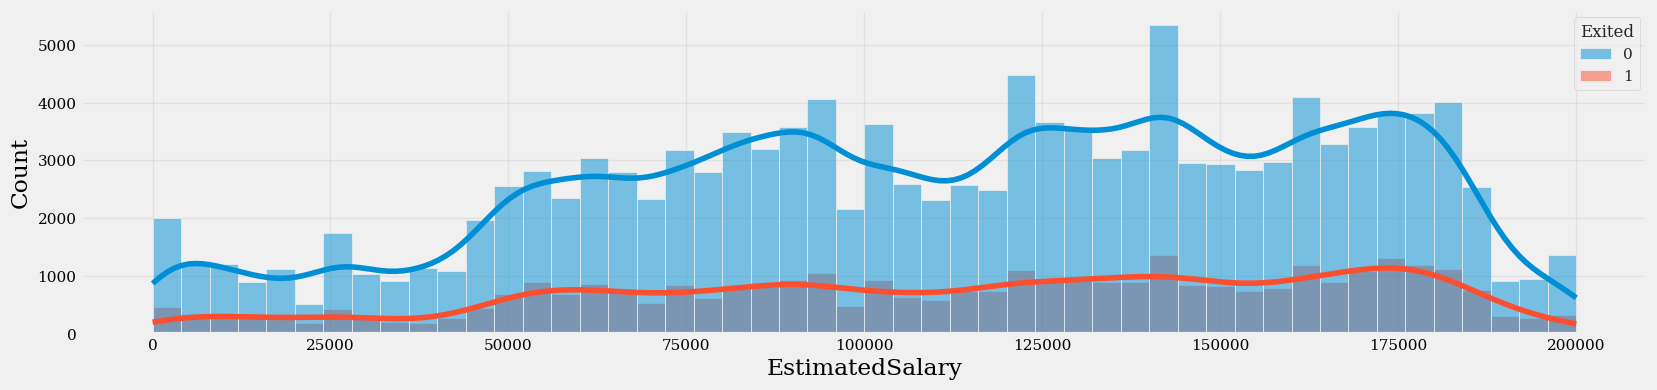

In [18]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

##### 위의 그래프로부터 얻은 몇 가지 관찰:
- balance 변수의 대부분 데이터는 0으로만 구성되어 있어 분포가 0쪽으로 치우쳐져 있습니다.
- 다른 변수들도 분포에서 왜곡이 나타납니다.
- 각 변수에 대한 두 클래스의 데이터 분포는 거의 동일합니다.

#### 2.5 다변량 분석:
다변량 분석은 동시에 둘 이상의 통계 결과 변수를 관찰하고 분석하는 것을 기반으로 합니다.

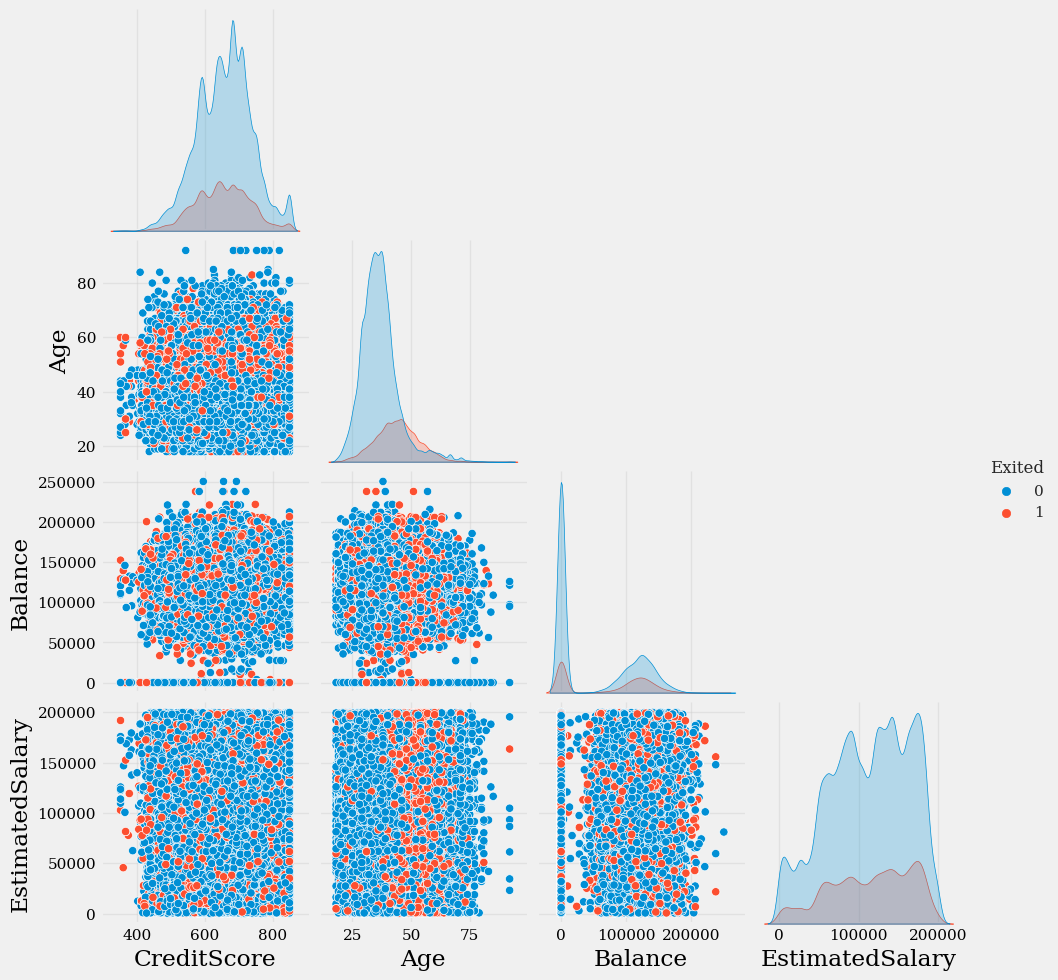

In [19]:
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

#### 2.6 상관 분석:
상관 분석은 두 변수 간의 관계나 의존성을 통계적으로 분석하는 것입니다. 상관은 두 변수 집합 간의 관계의 강도와 방향을 모두 연구할 수 있게 합니다.

주로 3가지 유형의 상관관계가 있습니다:

- 양의 상관관계: 두 변수가 같은 방향으로 움직일 때 양의 상관관계라고 합니다.
- 중립적 상관관계: 변수 X와 Y의 변화에 관계가 없습니다. 이 경우 값은 완전히 무작위이며 상관관계의 부호가 나타나지 않습니다.
- 음의 상관관계: 변수 X와 Y가 반대 방향으로 변할 때 음의 상관관계입니다.

#### Code Description
- corr_matrix=df4.corr(): 데이터프레임의 상관 행렬을 계산합니다.

- mask = np.zeros_like(corr_matrix): 상관 행렬의 윗 삼각 영역을 가리키는 마스크를 생성합니다.

- mask[np.triu_indices_from(mask)] = True: 마스크의 윗 삼각 영역을 True로 설정하여 가립니다.

- sns.heatmap(corr_matrix, mask=mask, annot=True): Seaborn 라이브러리의 heatmap 함수를 사용하여 상관 행렬을 히트맵으로 시각화합니다. 마스크를 적용하고, 각 셀에 상관 계수 값을 표시하도록 설정합니다.

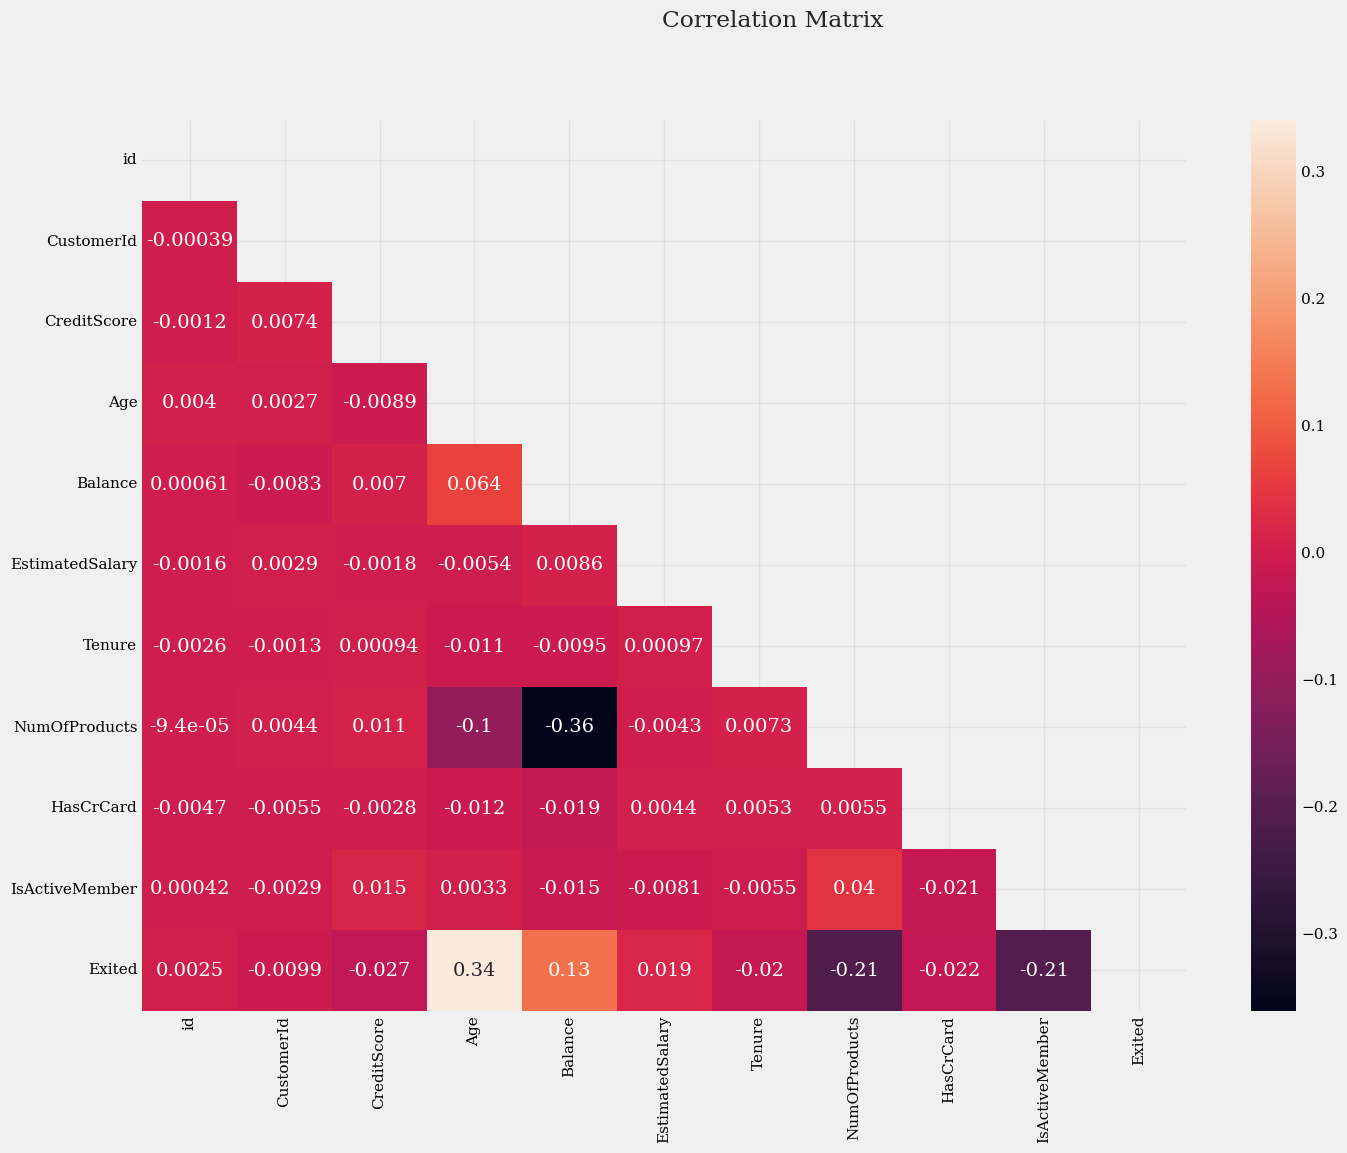

In [20]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [21]:
# 종속 변수 : Balance
# 독립 변수 : NumOfProducts



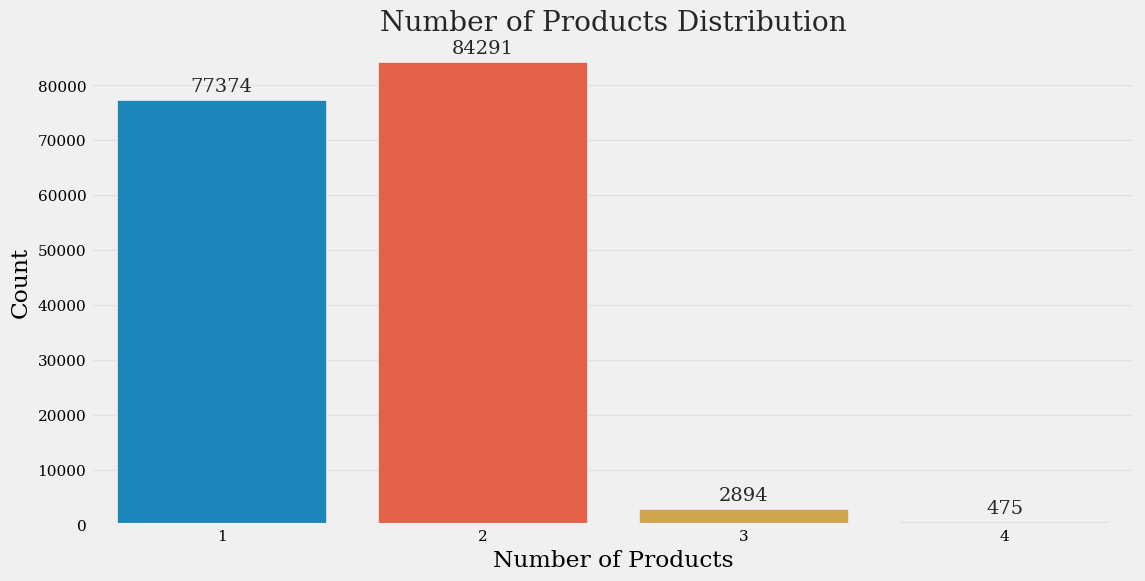

In [22]:
# 'NumOfProducts' 열을 기준으로 값의 개수를 계산
product_counts = train_data['NumOfProducts'].value_counts()

# 시각화 설정
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_counts.index, y=product_counts.values)
colors = sns.color_palette("muted")

# 각 막대 위에 정확한 개수 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # 높이를 정수 형식으로 표현
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

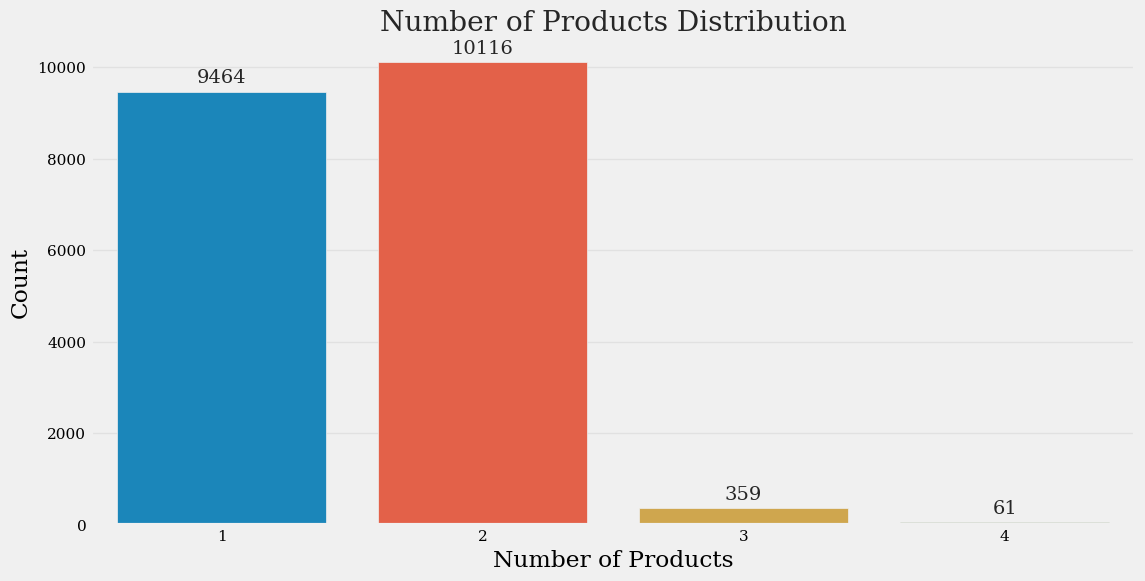

In [114]:
samaple_train = train_data.sample(n=20000, replace=False)

# 'NumOfProducts' 열을 기준으로 값의 개수를 계산
sample_product_counts = samaple_train['NumOfProducts'].value_counts()

# 시각화 설정
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sample_product_counts.index, y=sample_product_counts.values)
colors = sns.color_palette("muted")

# 각 막대 위에 정확한 개수 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # 높이를 정수 형식으로 표현
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

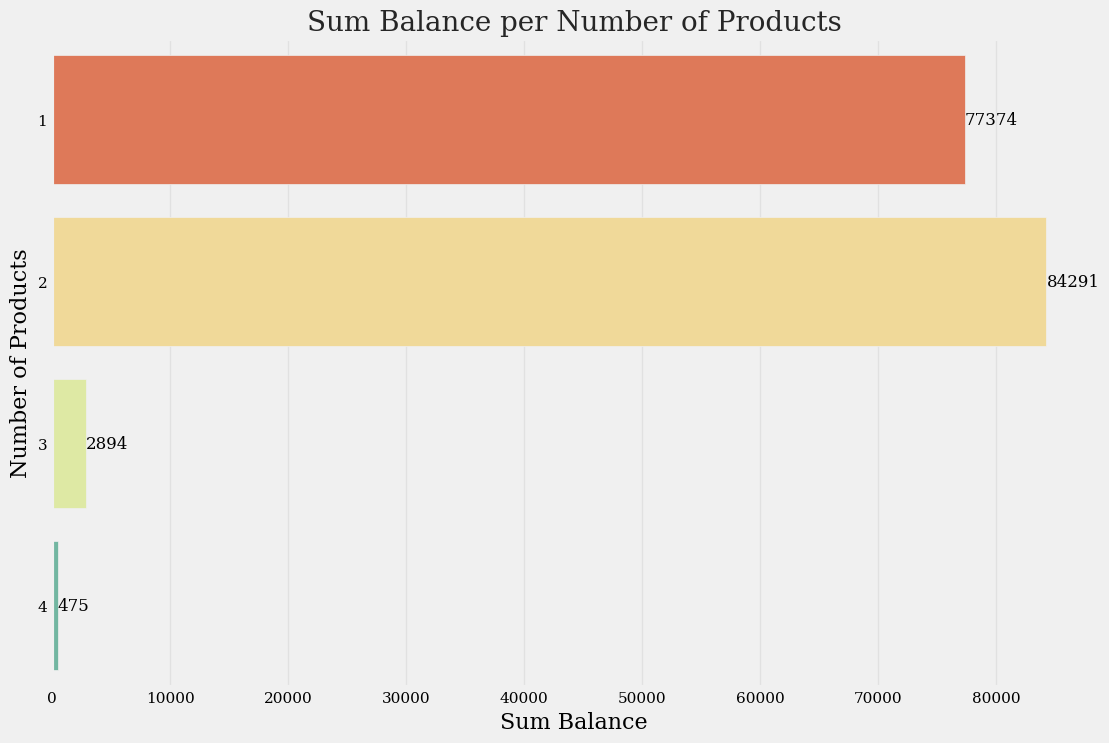

In [106]:
# 'NumOfProducts'로 그룹화하고 'Balance'의 합계 계산
df5 = train_data.copy()
grouped_data = df5.groupby('NumOfProducts')['Balance'].count()

# x와 y 데이터 준비
x = grouped_data.values
y = grouped_data.index.astype(int)

# 시각화
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Spectral", len(grouped_data))
ax = sns.barplot(x=x, y=y, orient='h', palette=colors)
ax.set_xlabel('Sum Balance', fontsize=16)
ax.set_ylabel('Number of Products', fontsize=16)
ax.set_title('Sum Balance per Number of Products', fontsize=20)

# 각 막대에 정확한 숫자 표시
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., 
            f'{int(p.get_width())}', 
            fontsize=12, color='black', ha='left', va='center')

plt.show()

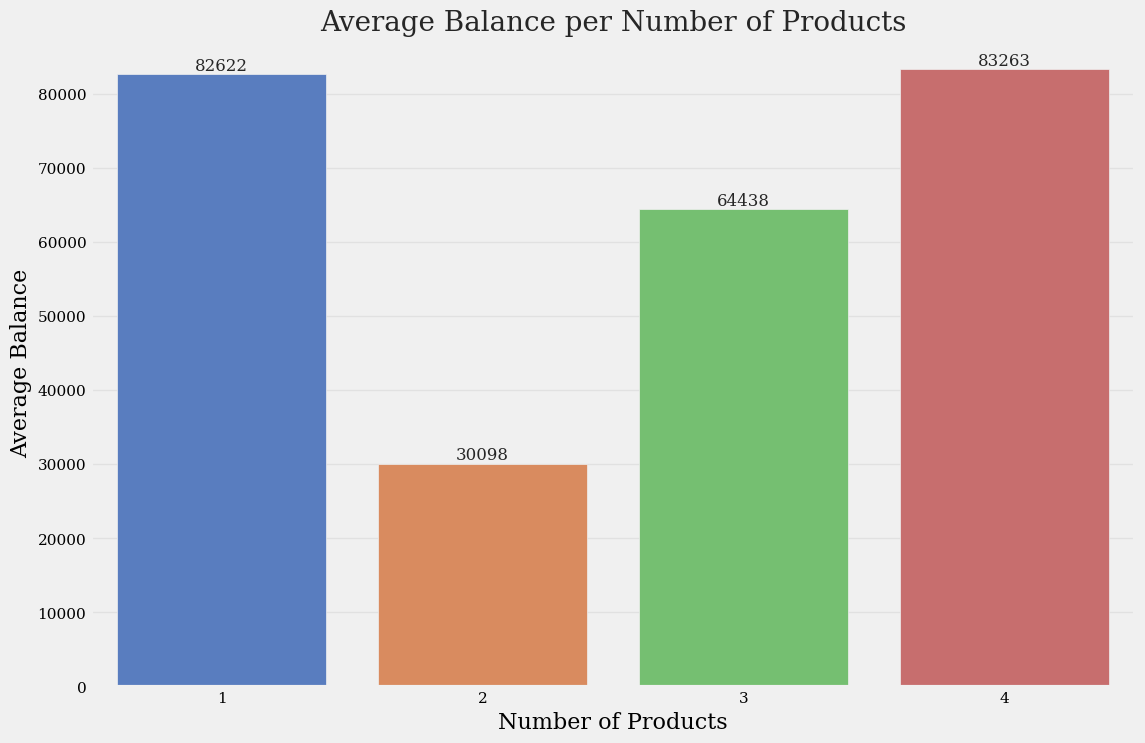

In [133]:
# 'NumOfProducts'로 그룹화하고 'Balance'의 평균 계산
df6 = train_data.copy()
grouped_data = df6.groupby('NumOfProducts')['Balance'].mean()

# x와 y 데이터 준비
x = grouped_data.index.astype(str)
y = grouped_data.values

# 시각화
plt.figure(figsize=(12, 8))
colors = sns.color_palette("muted")
ax = sns.barplot(x=x, y=y, palette=colors) # orient='v'는 기본값이므로 생략 가능
ax.set_xlabel('Number of Products', fontsize=16)
ax.set_ylabel('Average Balance', fontsize=16)
ax.set_title('Average Balance per Number of Products', fontsize=20)

# 각 막대 위에 정확한 수치 표시 (소수점 없이 반올림)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=12)

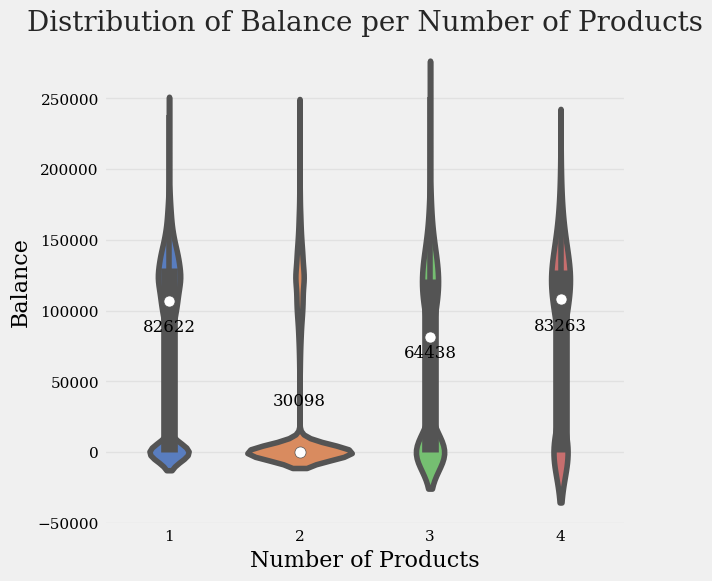

In [119]:
# 'NumOfProducts'로 그룹화하고 'Balance'의 평균 계산
df6 = train_data.copy()
grouped_data = df6.groupby('NumOfProducts')['Balance'].mean()

# x와 y 데이터 준비
x = grouped_data.values
y = grouped_data.index.astype(int) # 정수형으로 그리기

# 바이올린 플롯 그리기
plt.figure(figsize=(6, 6))
ax = sns.violinplot(x='NumOfProducts', y='Balance', data=df6, palette="muted")
ax.set_xlabel('Number of Products', fontsize=16)
ax.set_ylabel('Balance', fontsize=16)
ax.set_title('Distribution of Balance per Number of Products', fontsize=20)

# 각 바이올린 위에 평균값 표시
for i in range(len(grouped_data)):
    ax.text(i, grouped_data.iloc[i], f'{grouped_data.iloc[i]:.0f}', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.show()

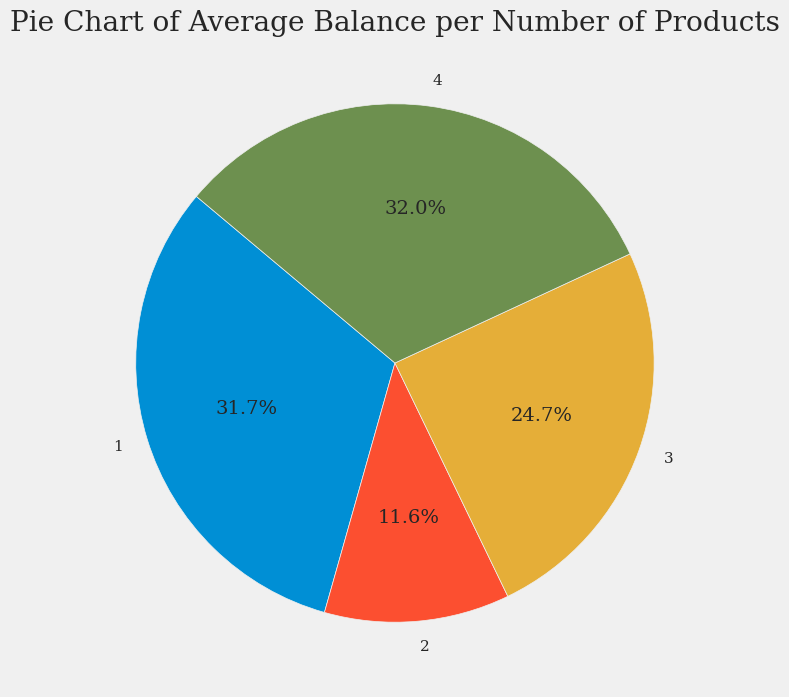

In [121]:
# 'NumOfProducts'로 그룹화하고 'Balance'의 평균 계산
df6 = train_data.copy()
grouped_data = df6.groupby('NumOfProducts')['Balance'].mean()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Average Balance per Number of Products')
plt.show()

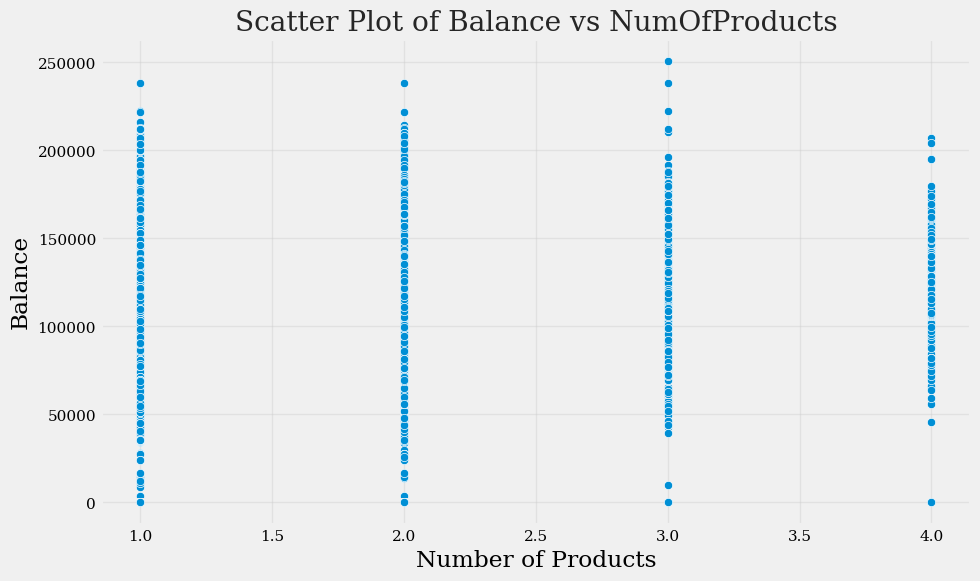

In [25]:
df7 = train_data.copy()

# Seaborn을 사용하여 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='NumOfProducts', y='Balance')
plt.title('Scatter Plot of Balance vs NumOfProducts')
plt.xlabel('Number of Products')
plt.ylabel('Balance')
plt.show()

In [127]:
df_age_numofproducts = train_data[['Age', 'NumOfProducts']].copy()
df_age_numofproducts

,Age,NumOfProducts
0,33.0,2
1,33.0,2
2,40.0,2
3,34.0,1
4,33.0,2
...,...,...
165029,33.0,1
165030,35.0,1
165031,31.0,1
165032,30.0,1


In [89]:
df_age = train_data[['Age']].copy()
df_age

,Age
0,33.0
1,33.0
2,40.0
3,34.0
4,33.0
...,...
165029,33.0
165030,35.0
165031,31.0
165032,30.0


In [90]:
# 연령대를 나누기 위한 구간 설정
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# 'Age' 열을 이용하여 연령대 구분을 수행하고 바로 그룹별 평균 계산에 사용
age_group_balance = train_data.groupby(pd.cut(train_data['Age'], bins=bins, labels=labels, right=False))['Balance'].mean().reset_index(name='AverageBalance')

# 결과 확인
age_group_balance

,Age,AverageBalance
0,10-20,56031.361145
1,21-30,52390.210928
2,31-40,52088.498886
3,41-50,59694.747815
4,51-60,68013.083512
5,61-70,58808.545276
6,71-80,54356.406802
7,81-90,35787.578125
8,91-100,74383.357273


In [126]:
# 연령대별로 그룹화하고 평균 Balance 및 카운트 계산
age_group_stats = train_data.groupby(pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)) \
    .agg(AverageBalance=('Balance', 'mean'), Count=('Balance', 'count')).reset_index()

# 결과 출력
age_group_stats


,Age,AverageBalance,Count
0,10-20,56031.361145,332
1,21-30,52390.210928,23202
2,31-40,52088.498886,81253
3,41-50,59694.747815,43319
4,51-60,68013.083512,12186
5,61-70,58808.545276,3920
6,71-80,54356.406802,763
7,81-90,35787.578125,48
8,91-100,74383.357273,11


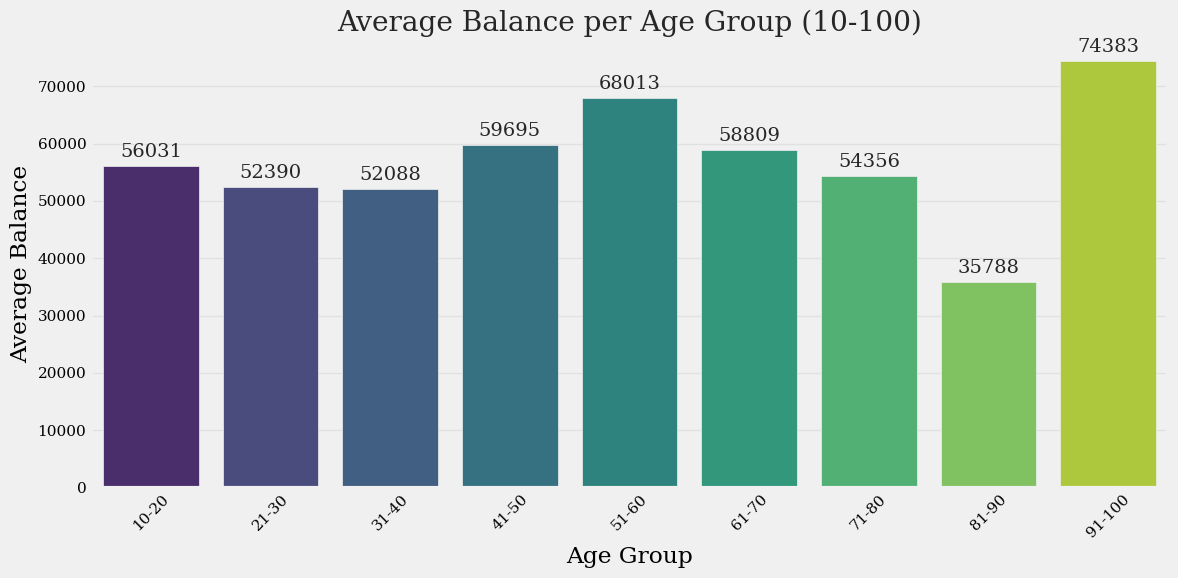

In [113]:
# 연령대 그룹별 평균 'Balance'를 시각화하는 코드
# 'Age' 열을 이용하여 연령대 구분을 수행하고 바로 그룹별 평균 계산에 사용
age_group_balance = train_data.groupby(pd.cut(train_data['Age'], bins=bins, labels=labels, right=False))['Balance'].mean().reset_index(name='AverageBalance')

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=age_group_balance, x='Age', y='AverageBalance', palette='viridis')
plt.title('Average Balance per Age Group (10-100)')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)

# 각 막대 위에 정확한 값을 표시 (소수점 없이 반올림)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

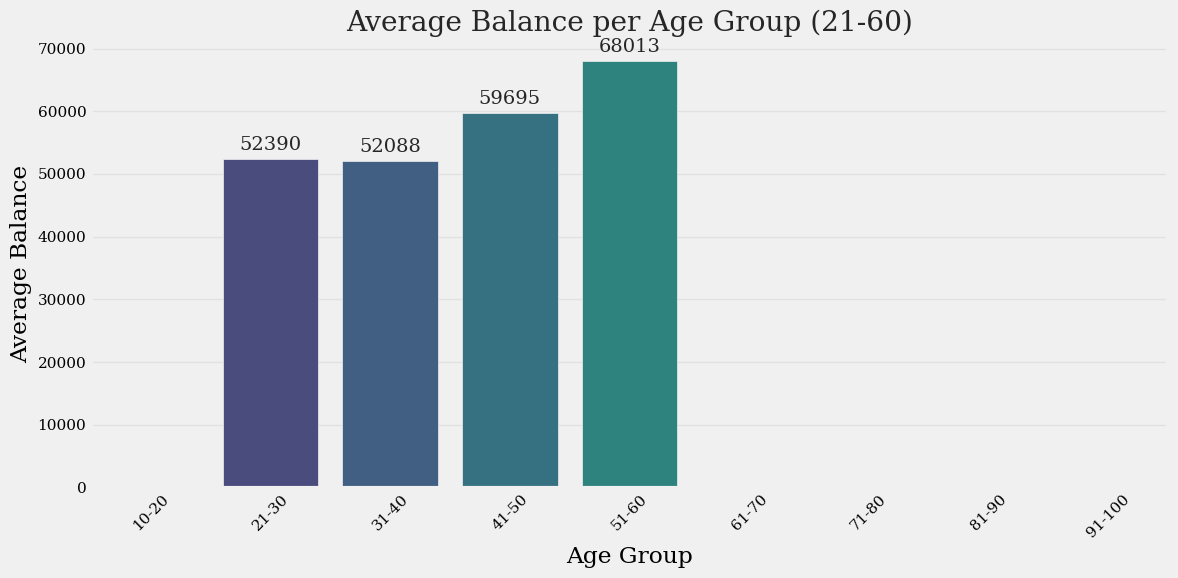

In [103]:
# 연령대 그룹별 평균 'Balance'를 시각화하는 코드 수정
# 21-30, 31-40, 41-50, 51-60 연령대 그룹만 시각화

# 지정된 연령대 그룹만 필터링
filtered_age_group_balance = age_group_balance[age_group_balance['Age'].isin(['21-30', '31-40', '41-50', '51-60'])]

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=filtered_age_group_balance, x='Age', y='AverageBalance', palette='viridis')
plt.title('Average Balance per Age Group (21-60)')
plt.xlabel('Age Group')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)

# 각 막대 위에 정확한 값을 표시 (소수점 없이 반올림)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

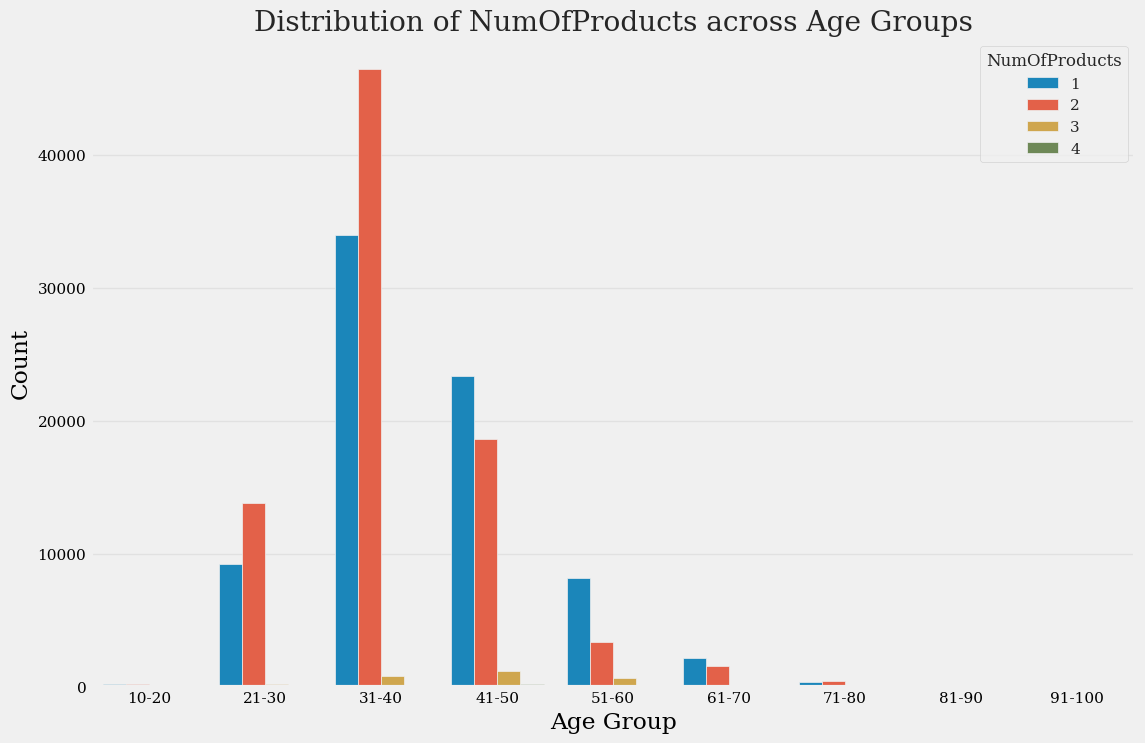

In [132]:
# 연령대 구간 설정
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# 'Age' 열을 이용하여 연령대 구분
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# seaborn을 이용한 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeGroup', hue='NumOfProducts', data=train_data)
plt.title('Distribution of NumOfProducts across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='NumOfProducts')
plt.show()

In [104]:
# Geography
df_Geography = train_data[['Geography']].copy()
df_Geography

,Geography
0,France
1,France
2,France
3,France
4,Spain
...,...
165029,Spain
165030,France
165031,France
165032,Spain


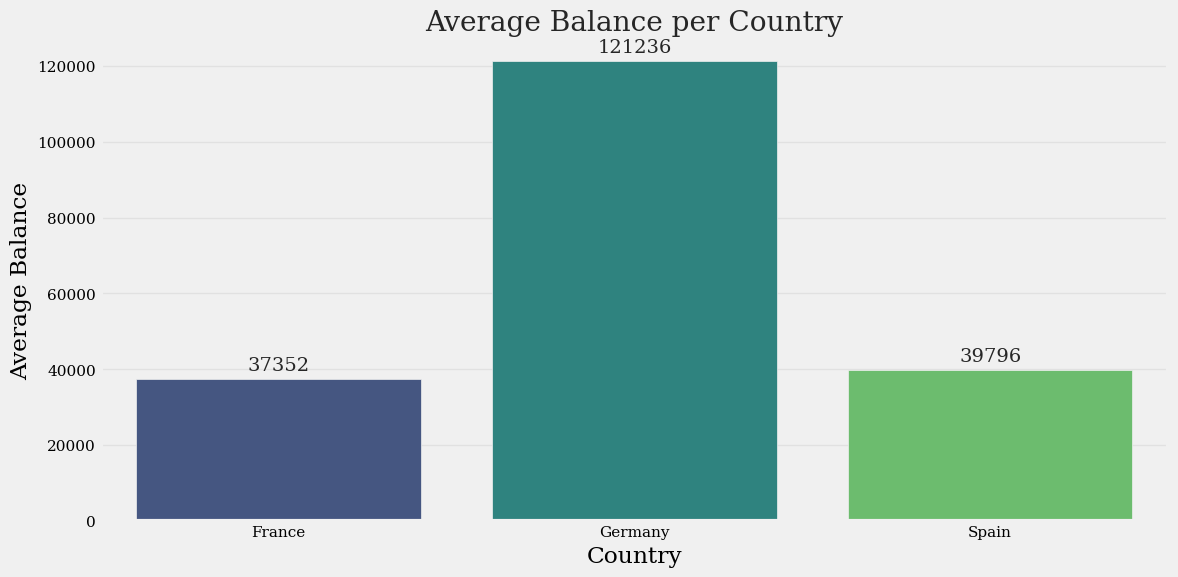

In [105]:
# 각 나라별로 평균 통장 잔고 계산
geography_balacne = train_data.groupby('Geography')['Balance'].mean().reset_index(name='AverageBalacne')

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=geography_balacne, x='Geography', y='AverageBalacne', palette='viridis')
plt.title('Average Balance per Country')
plt.xlabel('Country')
plt.ylabel('Average Balance')

# 각 막대 위에 평균 통장 잔고의 정확한 값을 표시 (소수점 없이 반올림)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
# 샘플 데이터 생성
sample_data = train_data.sample(n=20000, replace=False)
sample_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
16607,16607,15758048,Golubev,694,Germany,Male,31.0,6,109052.59,2,1.0,0.0,19448.93,0
136657,136657,15787026,Fanucci,590,France,Male,31.0,9,155619.36,1,1.0,1.0,166678.28,0
137229,137229,15589437,Y?an,597,Germany,Male,36.0,9,128829.25,2,1.0,1.0,138380.11,0
124818,124818,15668775,Nkemdilim,565,Germany,Male,45.0,4,121063.90,1,1.0,0.0,144532.85,1
154956,154956,15595728,Chukwujekwu,697,Spain,Male,37.0,1,121030.90,1,0.0,1.0,73066.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116727,116727,15661734,Taylor,591,Germany,Male,31.0,8,131390.75,2,1.0,0.0,71178.09,0
135173,135173,15650313,Chiu,763,France,Male,36.0,5,129855.32,1,1.0,0.0,39704.14,0
162484,162484,15682263,Chiawuotu,627,Germany,Male,38.0,7,126473.41,1,1.0,1.0,143858.47,0
144776,144776,15694819,Ulyanova,637,France,Female,42.0,8,0.00,2,1.0,0.0,116471.19,0


In [70]:
!pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.1 MB/s eta 0:00:00a 0:00:01


### NumOfProducts 